[![Build Status](https://travis-ci.org/vincentcp/Wavelets.jl.svg?branch=master)](https://travis-ci.org/vincentcp/Wavelets.jl)
[![Coverage Status](https://coveralls.io/repos/github/vincentcp/Wavelets.jl/badge.svg?branch=master)](https://coveralls.io/github/vincentcp/Wavelets.jl?branch=master)
# Wavelets
A julia package for a fast Discrete Wavelet Transform, and plotting and evaluation of wavelets 

In [1]:
#Pkg.clone("https://github.com/vincentcp/WaveletsCopy.jl.git")
#Pkg.build("WaveletsCopy")

In [2]:
using WaveletsCopys 
using Plots

A list of all available wavelets is given by

In [3]:
print_implemented_wavelets()

("db1", "db2", "db3", "db4", "db5", "db6", "db7", "db8", "db9", "db10", "cdf11", "cdf13", "cdf15", "cdf24", "cdf26", "cdf31", "cdf33", "cdf35", "cdf42", "cdf44", "cdf46", "cdf51", "cdf53", "cdf55", "cdf62", "cdf64", "cdf66")


Some examples are

In [4]:
db4, cdf53

(Wavelets.DWT.DaubechiesWavelet{4,Float64}(), Wavelets.DWT.CDFWavelet{5,3,Float64}())

## 1 The Discrete Wavelet Transform

The wavelet transform is performed using

In [5]:
a = rand(1<<8);
dwt(a, db3, perbound);

Only periodic boundaries boundaries and dyadic length are supported. 

In [6]:
perbound

Wavelets.DWT.PeriodicBoundary()

In [7]:
b = dwt(a,db3,perbound);
c = idwt(b,db3,perbound);
@assert a≈c

## 2 Evaluation of wavelets

Use

`function evaluate_periodic_in_dyadic_points{T}(side::DWT.Side, kind::DWT.Scl, w::DWT.DiscreteWavelet{T}, j=0, k=0, d=10)`

to evaluate the primal/dual wavelet function $\phi_{k,j}(x) = 2^{j/2}\phi(2^jx-k)$ of type `w` in equispaced grid with a separation of $2^{-d}$

Here an example plotting the scaling (red) and wavelet (blue) functions of the CDF wavelets cdf11, cdf13, ..., cdf44.
In the left columns the primal functions and in the righ columns the dual functions.

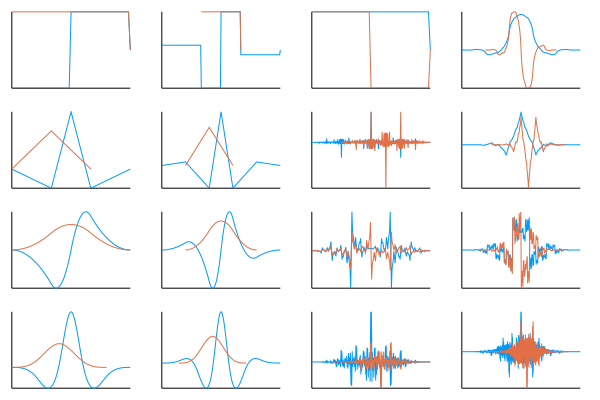

In [8]:
plot(layout=(4,4),legend=false,ticks=nothing, border=nothing)
i=1;j=0;k=0;d=6
for p in 1:4
  qs = 2:2:4
  isodd(p) && (qs = 1:2:4 )
  for q in qs
    f, x = evaluate_in_dyadic_points(Primal, wavelet, CDFWavelet{p,q,Float64}(), j, k, d; points=true)
    plot!(x, -f, subplot=i)
    f, x = evaluate_in_dyadic_points(Primal, scaling, CDFWavelet{p,q,Float64}(), j, k, d; points=true)
    plot!(x, f, subplot=i)
    i += 1
  end
  for q in qs
    f, x = evaluate_in_dyadic_points(Dual, scaling, CDFWavelet{p,q,Float64}(), j, k, d; points=true)
    plot!(x, f, subplot=i)
    f, x = evaluate_in_dyadic_points(Dual, wavelet, CDFWavelet{p,q,Float64}(), j, k, d; points=true)
    plot!(x, f, subplot=i)  
    i += 1
  end
end
plot!()

Different translations and scales

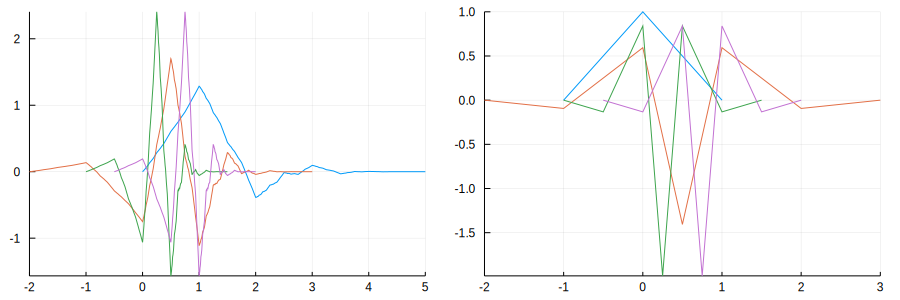

In [9]:
plot(legend=false, layout=2,size=(900,300))
for wavelet_index in wavelet_indices(2)
    wavelet, j, k = wavelet_index
    f, x = evaluate_in_dyadic_points(Primal, wavelet, db3, j, k; points=true)
    plot!(x,f)
    f, x = evaluate_in_dyadic_points(Primal, wavelet, cdf24, j, k; points=true)
    plot!(x,f,subplot=2)
end
plot!()

Use

`function evaluate_periodic_in_dyadic_points{T}(side::DWT.Side, kind::DWT.Scl, w::DWT.DiscreteWavelet{T}, j=0, k=0, d=10)`

for wavelets periodized to the interval [0,1].

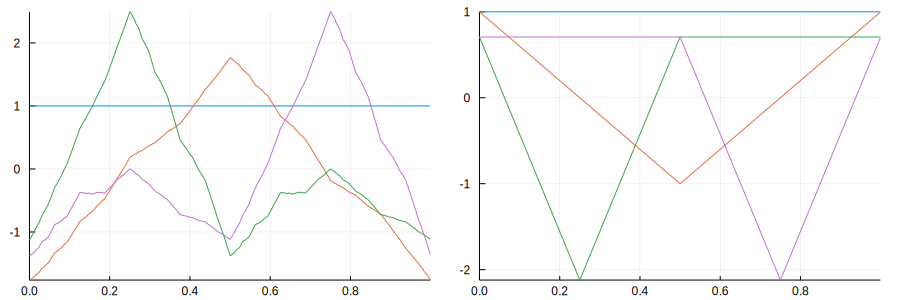

In [10]:
plot(legend=false, layout=2,size=(900,300))
for wavelet_index in wavelet_indices(2)
    wavelet, j, k = wavelet_index
    f, x = evaluate_periodic_in_dyadic_points(Primal, wavelet, db3, j, k; points=true)
    plot!(x,f)
    f, x = evaluate_periodic_in_dyadic_points(Primal, wavelet, cdf24, j, k; points=true)
    plot!(x,f,subplot=2)
end
plot!()

Also pointwise evaluation of scaling functions is possible up to some given precision. (There are still errors in the code depending on the point evaluation)
`evaluate{T, S<:Real}(side::Side, kind::Scl, w::DiscreteWavelet{T}, j::Int, k::Int, x::S; xtol::S=1e-5)`

`evaluate_periodic{T, S<:Real}(side::Side, kind::Kind, w::DiscreteWavelet{T}, j::Int, k::Int, x::S; xtol::S=1e-5)`

In [11]:
evaluate(Primal, scaling, db3, 0, 0, .123, xtol=1e-1), evaluate(Primal, scaling, db3, 0, 0, .123, xtol=1e-4)

(0.13394983521281625, 0.13129163397063862)

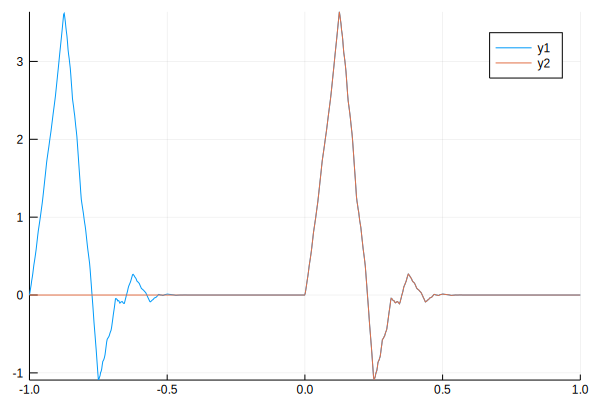

In [12]:
t = linspace(-1,1,1000)
plot(t,evaluate_periodic.(Primal, scaling, db3, 3, 0, t))
plot!(t,evaluate.(Primal, scaling, db3, 3, 0, t))

## 3. Plotting of Wavelets

Plot all in one figure

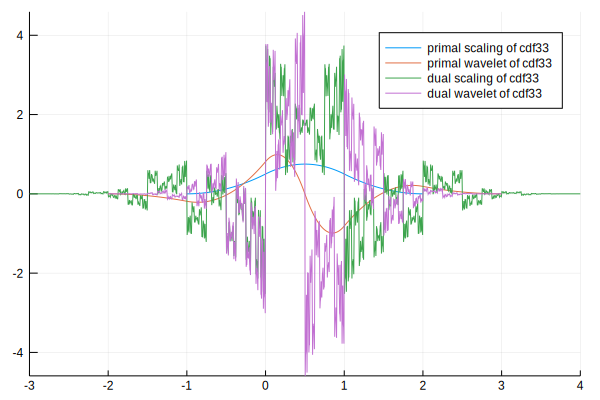

In [13]:
plot(cdf33)

Or over different figures

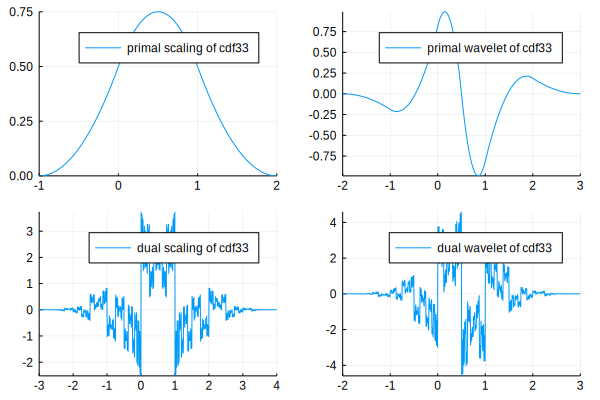

In [14]:
plot(cdf33,layout=(2,2))

Of orthogonal wavelets only primal functions are shown since the duals are equal to the primal functions

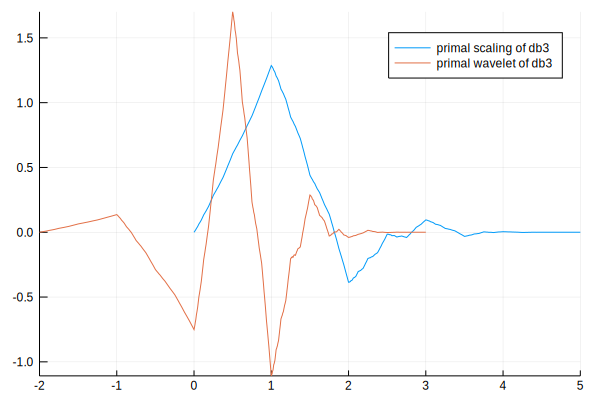

In [15]:
plot(db3)

Plot only the dual (or primal) ones

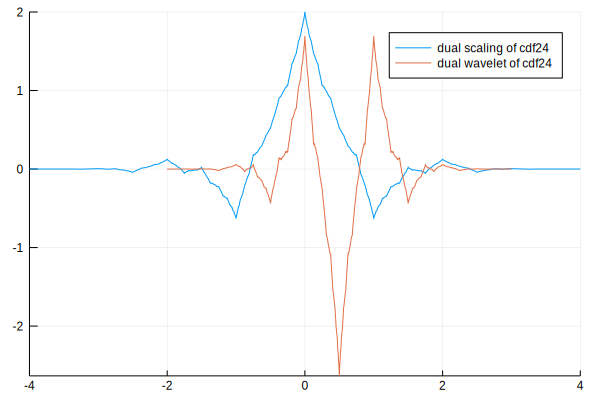

In [16]:
plot(Dual,cdf24)

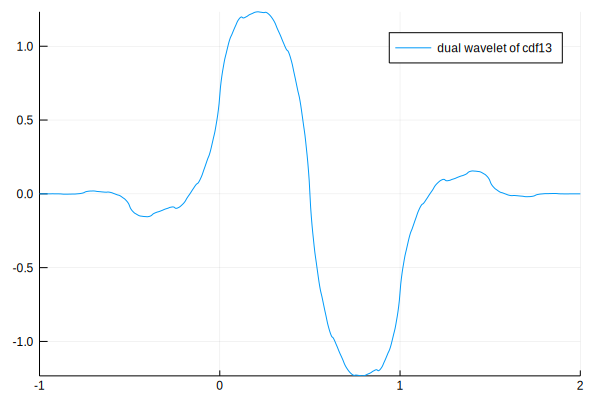

In [17]:
plot(Dual, wavelet,cdf13)